# Рабочая тетрадь № 4

## 1.1. Теоретический материал – Линейные регрессионные модели
**Линейная регрессия**  
Линейная регрессия (Linear regression) – модель зависимости переменной x от одной или нескольких других переменных (факторов, регрессоров, независимых переменных) с линейной функцией зависимости. Линейная регрессия относится к задаче определения «линии наилучшего соответствия» через набор точек данных и стала простым предшественником нелинейных методов, которые используют для обучения нейронных сетей.  

Цель линейной регрессии — поиск линии, которая наилучшим образом соответствует этим точкам. Напомним, что общее уравнение для прямой есть $f(x) = b + m⋅x +$, где $m$ - наклон линии, а $b$ - его сдвиг.  

**Функция потерь — метод наименьших квадратов**  
Функция потерь – это мера количества ошибок, которые наша линейная регрессия делает на наборе данных. Хотя есть разные функции потерь, все они вычисляют расстояние между предсказанным значением $y(x)$ и его фактическим значением.  
Одна очень распространенная функция потерь называется средней квадратичной ошибкой MSE. Чтобы вычислить MSE, мы просто берем все значения ошибок? считаем их квадраты длин и усредняем.  

**Задача экcтраполяции**  
Допустим у нас есть много экспериментальных точек. Необходимо через них провести кривую, которая как можно ближе проходила к этим точкам. При этом необходимо минимизировать среднюю квадратичную ошибку (MSE).  
Для решения данной задачи в Python есть множество библиотек. Самыми распостраненными выступают:  
  
**numpy - numpy.linalg.lstsq**  
**scipy - scipy.linalg** (содержит все функции из numpy.linalg плюс часть новых функций, которых нет в numpy.linalg).

### 1.1.1 Пример
#### Задача: проведем прямую $y = mx + b$ через экспериментальные точки

In [19]:
import numpy as np
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

# перепишем линейное уравнение y = mx как у = Ap, где A = [[ x 1]] и p = [[m], [c]]

A = np.vstack([x, np.ones(len(x))]).T
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [20]:
# используем метод lstsq для решения его относительно вектора p
m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

0.9999999999999999 -0.9499999999999994


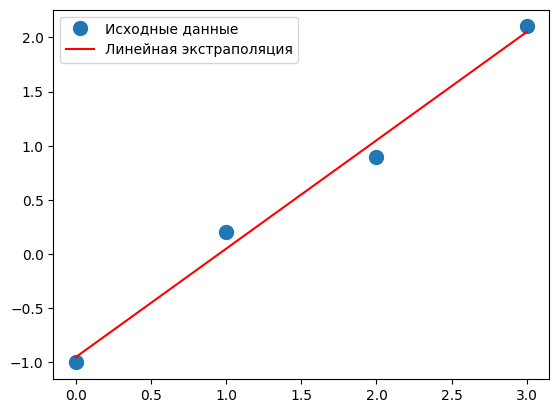

In [21]:
# построим график полученной прямой и укажем на нем точки
import matplotlib.pyplot as plt

plt.plot(x, y, 'o', label = 'Исходные данные', markersize = 10)
plt.plot(x, m * x + c, 'r', label = 'Линейная экстраполяция')
plt.legend()
plt.show()

### 1.1.2 Пример
#### Задача: Пусть $x$, $y$ – вектора длиной $n > 3$ (точек > 3). Задача заключается в построении эстраполяционного полинома второго порядка (параболы). Таким образом, необходимо найти такие коэффициенты полинома $a, b, c$ по методу наименьших квадратов. Данные мтогут быть получены в результате измерений. Покажем пример генерации данных случайным образом и загрузки их из файла.

In [22]:
from numpy import *
from numpy.random import *

# генерируем случайные x и y
delta = 1.0
x = linspace(-5, 5, 11)
y = x ** 2 + delta * (rand(11) - 0.5)
x += delta * (rand(11) - 0.5)

# записываем данные в файл
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

# читаем данные из файлов
x = fromfile('x_data.txt', float, sep = '\n')
y = fromfile('y_data.txt', float, sep = '\n')

print(x)
print(y)

[-5.33925247 -4.33876954 -2.8680727  -2.47567833 -0.60166374  0.20173694
  1.30336984  1.61924673  2.8232648   3.84230987  4.81700836]
[25.42403686 16.36563468  9.42663883  3.87423582  1.03883761  0.25814232
  1.48154499  4.16319362  9.3917323  15.57833744 25.00833881]


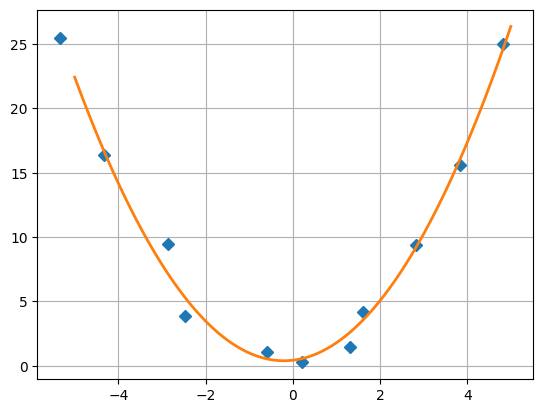

In [25]:
# нахождение коэффициентов функции вида y = ax^2 + bx + c с методом наименьших квадратов
# задаем вектор m = [x**2, x, E]
m = vstack((x**2, x, ones(11))).T

# находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]

# на отрезке [-5, 5]
x_prec = linspace(-5, 5, 101)

# рисуем точки
plt.plot(x, y, 'D')

# рисуем кривую вида y = ax^ 2 + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], '-', lw = 2)
plt.grid()
plt.savefig('парабола.png')

### 1.1.3 Пример
#### Задача: по данным предыдущего примера постройте эстраполяцию полинома третьего порядка

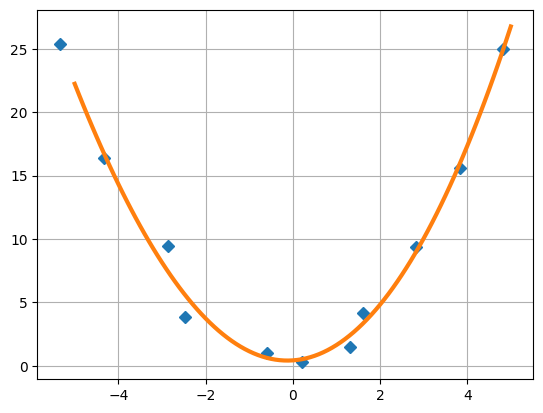

In [27]:
# нахождение коэффициентов функции вида y = ax^3 + bx^2 + cx + d методом наименьших квадратов
# задаем вектор m = [x**3, x, E]
m = vstack((x ** 3, x ** 2, x, ones(11))).T

# находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]

# на отрезке [-5, 5]
x_prec = linspace(-5, 5, 101)

#рисуем точки
plt.plot(x, y, 'D')

# рисуем кривую вида у = ax^3 + bx^2 + cx + d, подставляя коэффициенты s[0], s[1], s[2], s[3]
plt.plot(x_prec, s[0] * x_prec ** 3 + s[1] * x_prec ** 2 + s[2] * x_prec + s[3], '-', lw = 3)
plt.grid()
plt.savefig('полином 3-й степени.png')

### Задание
#### Задача: представьте собственные данные и постройте эктраполяцию полиномами первой, второй и третьей степени

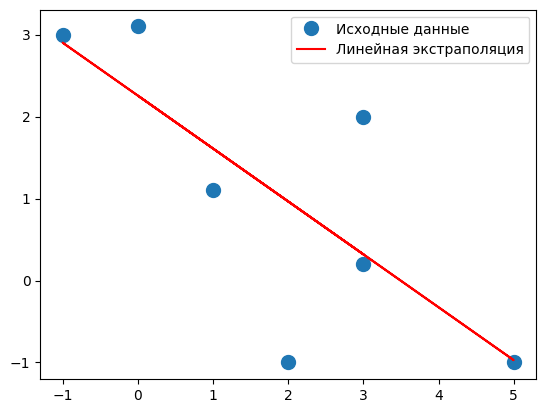

In [13]:
# полином первой степени
import numpy as np
x = np.array([3, 2, 1, 0, 5, -1 , 3])
y = np.array([0.2, -1, 1.1, 3.1, -1, 3, 2])

# перепишем линейное уравнение y = mx как у = Ap, где A = [[ x 1]] и p = [[m], [c]]
A = np.vstack([x, np.ones(len(x))]).T

# используем метод lstsq для решения его относительно вектора p
m, c = np.linalg.lstsq(A, y, rcond = None)[0]

# построим график полученной прямой и укажем на нем точки
import matplotlib.pyplot as plt

plt.plot(x, y, 'o', label = 'Исходные данные', markersize = 10)
plt.plot(x, m * x + c, 'r', label = 'Линейная экстраполяция')
plt.legend()
plt.show()


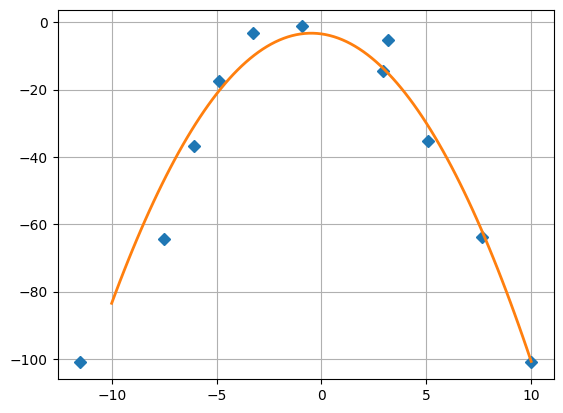

In [34]:
# полином второй степени
from numpy import *
from numpy.random import *

# генерируем случайные x и y
delta = 3.0
x = linspace(-10, 10, 11)
y = -x ** 2 + delta * (rand(11) - 0.5)
x += delta * (rand(11) - 0.5)

# записываем данные в файл
x.tofile('x_data1.txt', '\n')
y.tofile('y_data1.txt', '\n')

# читаем данные из файлов
x = fromfile('x_data1.txt', float, sep = '\n')
y = fromfile('y_data1.txt', float, sep = '\n')

# нахождение коэффициентов функции вида y = ax^2 + bx + c с методом наименьших квадратов
# задаем вектор m = [x**2, x, E]
m = vstack((x**2, x, ones(11))).T

# находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]

# на отрезке [-5, 5]
x_prec = linspace(-10, 10, 101)

# рисуем точки
plt.plot(x, y, 'D')

# рисуем кривую вида y = ax^ 2 + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], '-', lw = 2)
plt.grid()

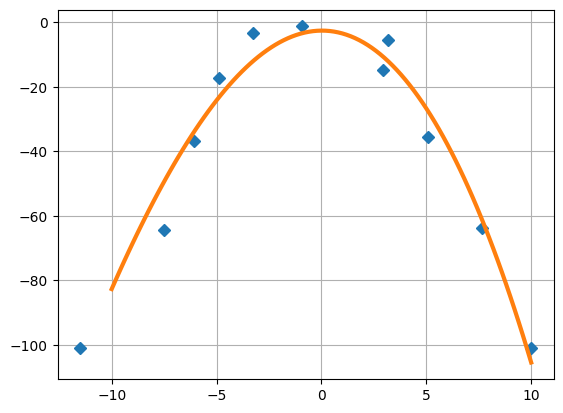

In [35]:
# полином третьей степени
# нахождение коэффициентов функции вида y = ax^3 + bx^2 + cx + d методом наименьших квадратов
# задаем вектор m = [x**3, x, E]
m = vstack((x ** 3, x ** 2, x, ones(11))).T

# находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]

# на отрезке [-5, 5]
x_prec = linspace(-10, 10, 101)

#рисуем точки
plt.plot(x, y, 'D')

# рисуем кривую вида у = ax^3 + bx^2 + cx + d, подставляя коэффициенты s[0], s[1], s[2], s[3]
plt.plot(x_prec, s[0] * x_prec ** 3 + s[1] * x_prec ** 2 + s[2] * x_prec + s[3], '-', lw = 3)
plt.grid()

### 1.1.4 Пример
#### Задача: Необходимо проверить гипотезу, что наши точечно заданная функция ложится на кривую вида $f(x,b) = b_{0} + b_{1}exp(-b2x^2)$

In [7]:
import scipy as sp
from  scipy.optimize import  curve_fit

# добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (0.25, 0.75, 0.5)
beta=(0.25, 0.75,0.5)

def f(x,b0,b1,b2):
    return b0+b1*np.exp(-b2*(x**2))

# зададим массив точек xi
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata,*beta)

# зашумляем эти данные
ydata = y+ 0.05 * np.random.rand(len(xdata))

print(xdata)
print(ydata)

# используя фунцию для получения решения в виде коэффициентов функции f(x) для указанных xdata и ydata
beta_opt, beta_cov = sp.optimize.curve_fit(f,xdata,ydata)
beta_opt

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[1.00457629 1.0253172  1.01382126 1.01390342 0.94710641 0.91401963
 0.89109691 0.84846281 0.81761314 0.78578406 0.69974234 0.67318906
 0.60941741 0.58003218 0.56624544 0.50307222 0.48837459 0.43301898
 0.43842933 0.36878142 0.34412335 0.3699691  0.3400162  0.31481791
 0.30871727 0.28805146 0.3063765  0.28599724 0.27004204 0.30283102
 0.26965155 0.26628561 0.26539443 0.26041961 0.26801405 0.29187746
 0.28184566 0.29078074 0.28384724 0.29

array([0.27421184, 0.74706936, 0.49957581])

In [8]:
# вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# вычислим среднее квадратическое отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

2.094807776044971e-05
0.010798615336290673


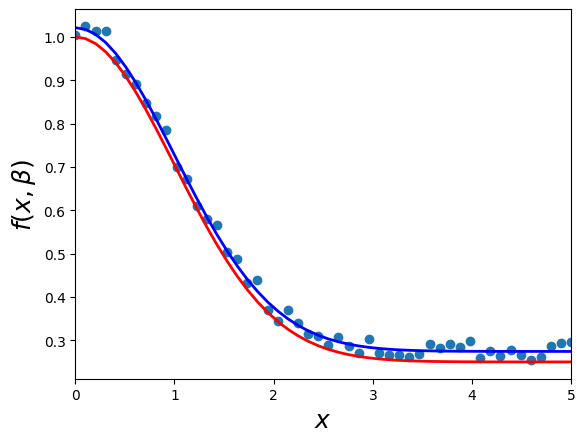

In [9]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize = 18)
plt.show()


### 1.1.5 Пример
#### Задача: необходимо проверить гипотезу, что наши точечно заданная функция ложится на кривые вида:

1. $F(x, b) = b_{0} + b_{1}x$
2. $F(x, b) = b_{0} + b_{1}x + b_{2}x^2$
3. $F(x, b) = b_{0} + b_{1}ln(x)$
4. $F(x, b) = b_{0}x^{b_{1}}$

[0.27342198 0.75008861]
1.41539848434707e-05
0.012445745508609217


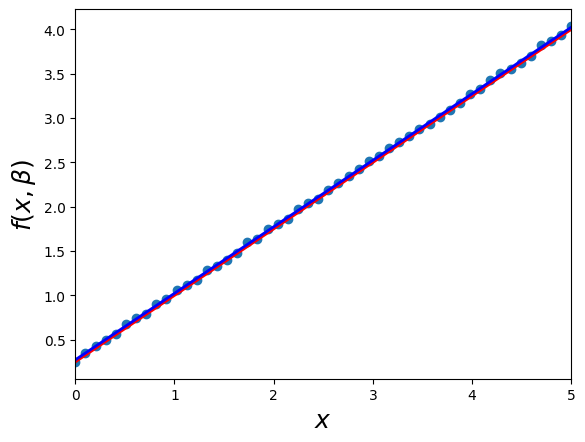

In [10]:
# 1
import matplotlib.pyplot as plt
import scipy as sp
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import numpy as np
from  scipy.optimize import  curve_fit

# добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (0,25, 0.75)
beta = (0.25,0.75)

def f(x,b0,b1):
    return b0 + b1*x

# зададим массив точек xi
xdata = np.linspace(0,5,50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)

# зашумляем эти данные
ydata = y + 0.05 * np.random.rand(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f,xdata,ydata)
print(beta_opt)

# вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# вычислим квадратическое отклонение
residuals = ydata -f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig,ax = plt.subplots()
ax.scatter(xdata,ydata)

ax.plot(xdata,y,'r',lw =2 )
ax.plot(xdata,f(xdata,*beta_opt),'b',lw = 2)

ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize = 18)
plt.show()

[0.28290826 0.73975081 0.50231856]
1.1043563921699058e-05
0.009209176330516426


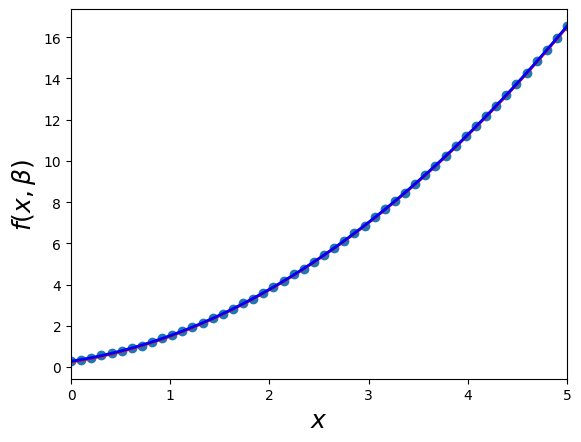

In [11]:
# 2
import matplotlib.pyplot as plt
import scipy as sp
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import numpy as np
from  scipy.optimize import  curve_fit

# добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (0,25, 0.75, 0.5)
beta = (0.25,0.75,0.5)

def f(x,b0,b1,b2):
    return b0 + b1*x+b2*x*x

# зададим массив точек xi
xdata = np.linspace(0,5,50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти ланные
ydata = y + 0.05 * np.random.rand(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f,xdata,ydata)
print(beta_opt)

# вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# вычислим квадратическое отклонение
residuals = ydata -f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig,ax = plt.subplots()
ax.scatter(xdata,ydata)

ax.plot(xdata,y,'r',lw =2 )
ax.plot(xdata,f(xdata,*beta_opt),'b',lw = 2)

ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize = 18)
plt.show()


[1.02962374 1.99565343]
5.07741016802595e-06
0.01174121285708071


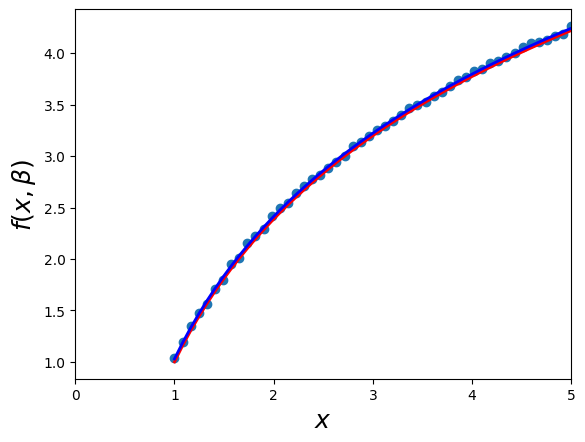

In [12]:
# 3
import matplotlib.pyplot as plt
import scipy as sp
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import numpy as np
from  scipy.optimize import  curve_fit

# добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (1, 2)
beta = (1,2)
def f(x,b0,b1):
    return b0 + b1*np.log(x)
# зададим массив точек xi
xdata = np.linspace(1,5,50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.rand(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f,xdata,ydata)
print(beta_opt)

# вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# вычислим квадратичное отклонение
residuals = ydata -f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig,ax = plt.subplots()
ax.scatter(xdata,ydata)

ax.plot(xdata,y,'r',lw =2 )
ax.plot(xdata,f(xdata,*beta_opt),'b',lw = 2)

ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize = 18)
plt.show()

[1.00978673 1.99432698]
6.150023807746495e-07
0.01416761507340142


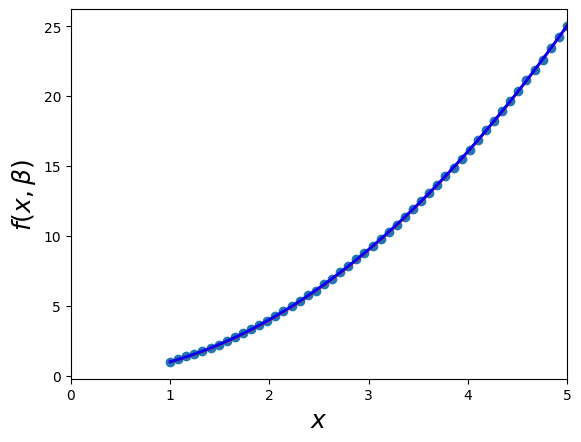

In [13]:
# 4
import matplotlib.pyplot as plt
import scipy as sp
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import numpy as np
from  scipy.optimize import  curve_fit

# добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (1, 2)
beta = (1, 2)
def f(x,b0,b1):
    return b0 * x **b1

# зададим массив точек xi
xdata = np.linspace(1,5,50)

# создадим теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)

# зашумляем эти данные
ydata = y + 0.05 * np.random.rand(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f,xdata,ydata)
print(beta_opt)

# вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig,ax = plt.subplots()
ax.scatter(xdata, ydata)

ax.plot(xdata,y,'r',lw =2 )
ax.plot(xdata,f(xdata, *beta_opt), 'b', lw = 2)

ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize = 18)
plt.show()

### Задание
#### Задача: Подставьте собственные данные и поэкспериментируйте с представленными функциями. Проанализируйте динамику изменения данных

[10.02621135  0.10038485]
1.107843413010513e-05
0.009741382434033526


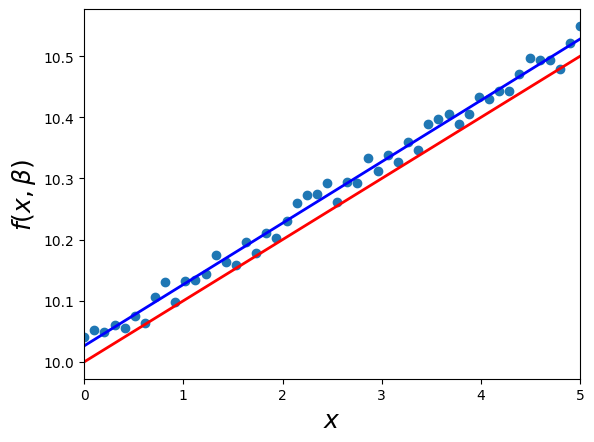

In [62]:
# 1
import matplotlib.pyplot as plt
import scipy as sp
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import numpy as np
from  scipy.optimize import  curve_fit

beta = (10, 0.1)

def f(x,b0,b1):
    return b0 + b1*x

xdata = np.linspace(0,5,50)
y = f(xdata, *beta)

ydata = y + 0.05 * np.random.rand(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f,xdata,ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata -f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig,ax = plt.subplots()
ax.scatter(xdata,ydata)

ax.plot(xdata,y,'r',lw =2 )
ax.plot(xdata,f(xdata,*beta_opt),'b',lw = 2)

ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize = 18)
plt.show()

[0.11844639 0.01545584 0.09905009]
1.2377048496759238e-05
0.010321162877267016


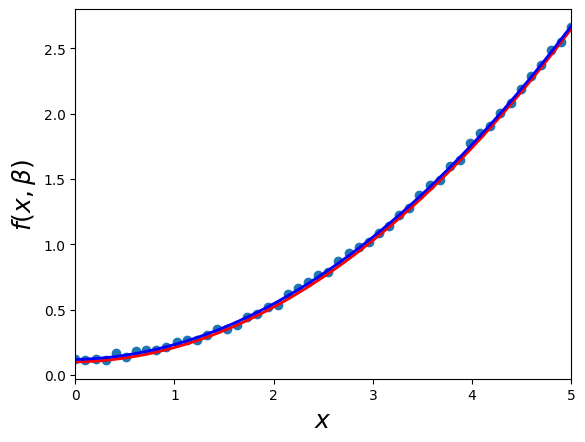

In [61]:
# 2
import matplotlib.pyplot as plt
import scipy as sp
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import numpy as np
from  scipy.optimize import  curve_fit

beta = (0.1, 0.01, 0.1)

def f(x,b0,b1,b2):
    return b0 + b1*x+b2*x*x

xdata = np.linspace(0,5,50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.rand(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f,xdata,ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata -f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig,ax = plt.subplots()
ax.scatter(xdata,ydata)

ax.plot(xdata,y,'r',lw =2 )
ax.plot(xdata,f(xdata,*beta_opt),'b',lw = 2)

ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize = 18)
plt.show()


[0.12694148 0.19952899]
5.5234462604897816e-06
0.012772646454122757


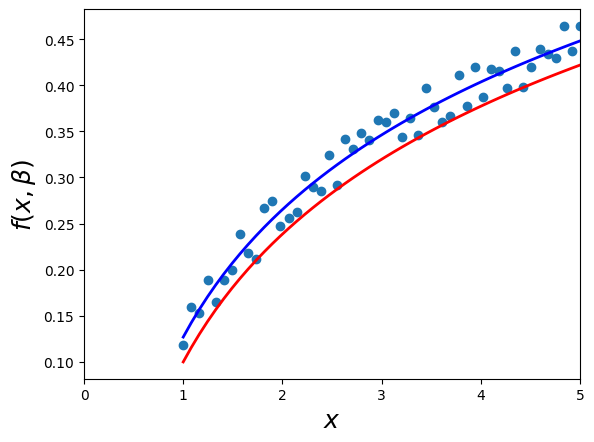

In [69]:
# 3
import matplotlib.pyplot as plt
import scipy as sp
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import numpy as np
from  scipy.optimize import  curve_fit

beta = (0.1, 0.2)
def f(x,b0,b1):
    return b0 + b1*np.log(x)
xdata = np.linspace(1,5,50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.rand(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f,xdata,ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata -f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig,ax = plt.subplots()
ax.scatter(xdata,ydata)

ax.plot(xdata,y,'r',lw =2 )
ax.plot(xdata,f(xdata,*beta_opt),'b',lw = 2)

ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize = 18)
plt.show()

[0.52763359 0.47975763]
-8.123266743218049e-06
0.011524665554365767


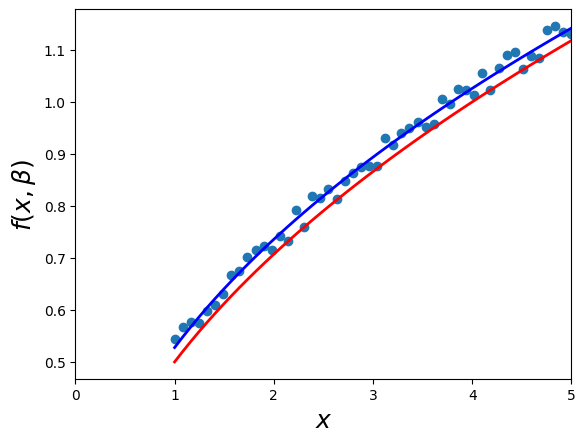

In [74]:
# 4
import matplotlib.pyplot as plt
import scipy as sp
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import numpy as np
from  scipy.optimize import  curve_fit

beta = (0.5, 0.5)
def f(x,b0,b1):
    return b0 * x **b1

xdata = np.linspace(1,5,50)

y = f(xdata, *beta)

ydata = y + 0.05 * np.random.rand(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f,xdata,ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig,ax = plt.subplots()
ax.scatter(xdata, ydata)

ax.plot(xdata,y,'r',lw =2 )
ax.plot(xdata,f(xdata, *beta_opt), 'b', lw = 2)

ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize = 18)
plt.show()

## 1.2. Теоретический материал – Задачи регрессии
**Линейная регрессия** - это широко используемый метод статистического анализа, который использует регрессионный анализ в математической статистике для определения количественной взаимосвязи между двумя или более переменными. Если регрессионный анализ включает две или более независимых переменных, а связь между зависимой и независимой переменными является линейной, тогда имееи дело с множественной линейной регрессией.  
  
В этом разделе мы увидим, как библиотеку Scikit-Learn в Python для машинного обучения можно использовать для реализации функций регрессии. Мы начнем с простой линейной регрессии с участием двух переменных, а затем перейдем к линейной регрессии с участием нескольких переменных.

### 1.2.1 Пример
#### Задача: построим простую линейную регрессию в Python с использованием библиотеки scikit-learn

In [2]:
# импортируем необходимые библиотеки
# используем pandas и numpy для обработки данных
# matplotlin для визуализации и sklearn для обучения наборов данных и импорта моделей

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# создадим набор данных для описания взаимосвзяи между временем обучения студентов и успеваемости
my_dict = {'Учебное время': [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50], 
           'Оценка': [10, 22, 13, 43, 20, 22, 33, 50, 62, 48, 55, 75, 62, 73, 81, 76, 64, 82, 90, 93]}

dataset = pd.DataFrame(my_dict)
dataset.head()

,Учебное время,Оценка
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


In [3]:
# исследуем набор данных 
print(dataset.shape)
dataset.describe()

(20, 2)


,Учебное время,Оценка
count,20.000000,20.000000
mean,2.787500,53.700000
std,1.507165,26.435821
min,0.500000,10.000000
25%,1.687500,30.250000
50%,2.625000,58.500000
75%,4.062500,75.250000
max,5.500000,93.000000


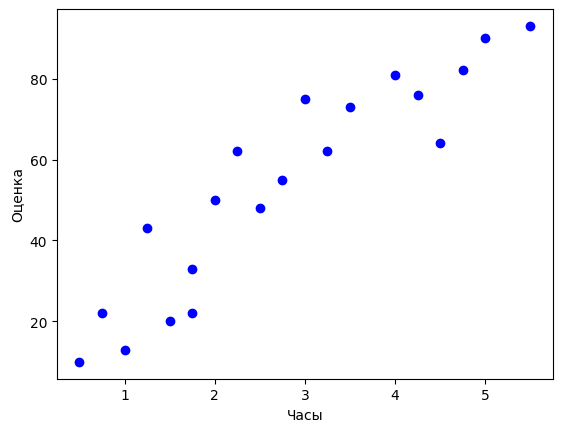

In [4]:
# нарисуем точечную диаграмму 
plt.scatter(dataset['Учебное время'], dataset['Оценка'], color = 'b', label = 'Данные экзамена')
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.show()

После того как мы получили представление о данных, разделим информацию на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки – это зависимые переменные, значения которых должны быть предсказаны. В нашем наборе всего два столбца и необходимо предсказать оценку в зависимости от количества часов. Чтобы извлечь атрибуты и метки, выполните следующий скрипт:

In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(X)
print(y)

# теперь, когда у нас есть атрибуты и метки, необходимо разделить их на обучающий и тестовый наьоры.
# приведенный фрагмент разделяет 80% данных на обучающий набор, а 20% данных - на набор тестов

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# далее можно обучить алгоритм линейной регресс
# необходимо импортровать класс LinearRegression, создать его экземпляр и вызвать метод fit()
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# приведем получившиеся коэффициенты для линии регрессии
print(regressor.intercept_)
print(regressor.coef_)

[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]
5.475400029908791
[17.02706744]


Получившийся результат можно интерпретировать следующим образом: с каждым затраченным часом на обучение результат экзамена повышается приблизительно на 17 баллов. Далее можно построить прогнозы. Для этого мы будем использовать наши тестовые данные и посмотрим, насколько точно наш алгоритм предсказывает процентную оценку. Чтобы сделать прогноз на тестовых данных необходимо выполнить следующий код:

In [6]:
y_pred = regressor.predict(X_test)

# сравним фактические значения с предсказуемыми
df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,90,90.610737
1,22,18.245701
2,93,99.124271
3,62,43.786302


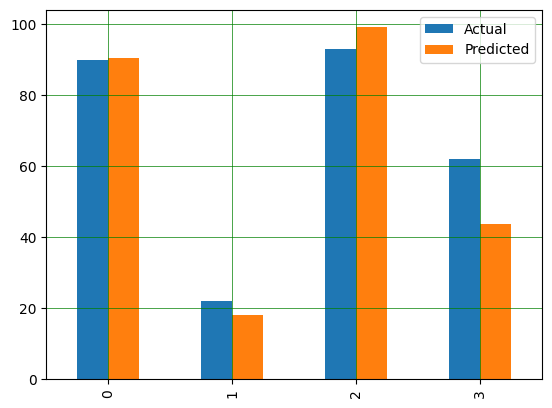

In [7]:
# визуализируем результат сравнения в виде гистограммы

df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

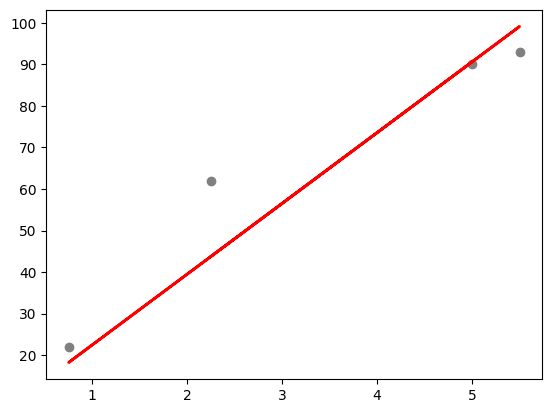

In [8]:
# построим линию регрессии с тестовыми данными
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

### Задание
#### Задача: Постройте модель линейной регрессии для произвольных данных из двух столбцов. Для примера можно взять точечную зависимость заработной платы от опыта работы: (https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv). Найдите коэффициенты линии регрессии. Постройте прогноз.

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
Коэффициент: 9312.575126729193
Пересечение: 26780.099150628157


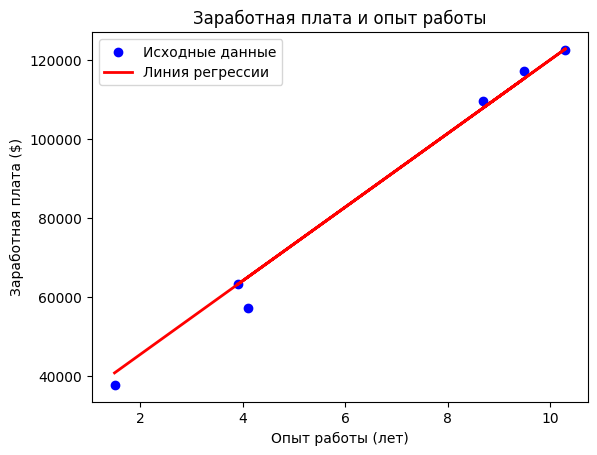

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# загрузка данных
url = "https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"
data = pd.read_csv(url)

# первые столбцы
print(data.head())

# признаки - опыт работы и целевая переменная - заработная плата
X = data['YearsExperience'].values.reshape(-1, 1)
y = data['Salary'].values

# разделение данных на обучающую и тестовую выборки (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# создание модели линейной регрессии обучение модели на обучающих данных
model = LinearRegression()
model.fit(X_train, y_train)

# получение коэффициентов линии регрессии
coef = model.coef_
intercept = model.intercept_

print(f"Коэффициент: {coef[0]}")
print(f"Пересечение: {intercept}")

# построение прогноза
y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, color='blue', label='Исходные данные')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Линия регрессии')
plt.title('Заработная плата и опыт работы')
plt.xlabel('Опыт работы (лет)')
plt.ylabel('Заработная плата ($)')
plt.legend()
plt.show()


## 1.3. Теоретический материал – Множественная регрессия
В предыдущем примере мы проиллюстрировали линейную регрессию с двумя переменными. Однако, почти все реальные задачи имеют больше параметров. Линейная регрессия с участием нескольких переменных называется «множественной линейной регрессией» или многомерной линейной регрессией. Шаги для выполнения множественной линейной регрессии аналогичны шагам для простой . Разница заключается в оценке. Вы можете использовать множественную регрессию, чтобы узнать, какой фактор оказывает наибольшее влияние на прогнозируемый результат или как различные переменные связаны друг с другом.

### 1.3.1 Пример
#### Задача: Для решения задачи множественной регрессии можно задействовать уже известный метод `numpy.linalg.lstsq`.

In [10]:
import numpy as np

y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
     [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
     [4,1,2,5,6,7,8,9,7,8,7,8,4,4,3,1,2,3,4,1,3,9,7]]

X = np.transpose(X) # transpose to input vectors
X = np.c_[X, np.ones(X.shape[0])] # add bies term

linreg = np.linalg.lstsq(X, y, rcond=None)[0]
print(linreg)

[ 0.13099364  0.26625828 -0.02194925  1.50231509]


Кроме этого можно использовать возможности библиотеки sсikit-learn.
Рассмотрим пример.

### 1.3.2 Пример
#### Задача: Для данных из предыдущей задачи построить модель множественной линейной регрессии с использованием средств библиотеки `sсikit-learn`.

In [93]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance

from  sklearn.model_selection import train_test_split
from  sklearn.linear_model import LinearRegression
from  sklearn import metrics

y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
     [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
     [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]

# формируем DataFrame из двух списков
new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_X = np.array(X)
new_X = new_X.transpose()
df2 = pd.DataFrame(new_X)
df1 = df1.rename(columns={0:'y'}, inplace= False)
df2 = df2.rename(columns={0:'x1',1:'x2',2:'x3'},inplace= False)

frames = [df1,df2]
dataset = pd.concat([df1,df2], axis=1,join="inner")
dataset.head()

,y,x1,x2,x3
0,1,0,4,4
1,2,2,1,1
2,3,4,2,2
3,4,1,3,5
4,3,5,4,6


In [98]:
# изучим данные
print(dataset.shape)
dataset.describe()

(23, 4)


,y,x1,x2,x3
count,23.000000,23.000000,23.000000,23.000000
mean,3.565217,5.347826,5.521739,5.043478
std,1.674029,2.404706,2.428422,2.704849
min,0.000000,0.000000,1.000000,1.000000
25%,3.000000,4.500000,4.000000,3.000000
50%,4.000000,5.000000,6.000000,5.000000
75%,5.000000,6.500000,7.500000,7.000000
max,6.000000,9.000000,9.000000,9.000000


In [107]:
# разделим данные на метки и атрибуты
X = dataset[['x1','x2','x3']]
y = dataset['y']

# разделим данные на обучающую и тестовую выборки
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.2,random_state=42)

# для обучения алгоритма сы выполняем тот же код, что и раньше, используя метод fit()
# класса LinearRegression()
regressor = LinearRegression()
regressor.fit(X_train,y_train)

# выведем коэффициенты модели
coeff_df =  pd.DataFrame(regressor.coef_,X.columns, columns=["Coefficient"])
coeff_df

,Coefficient
x1,0.393443
x2,0.081967
x3,0.295082


In [108]:
# чтобы сделать прогнозы на тестовых данных, выполните следующий код
y_pred = regressor.predict(X_test)

df = pd.DataFrame({"Actual":y_test,'Predicted':y_pred})
df

,Actual,Predicted
15,5,3.491803
9,5,6.737705
0,1,1.688525
8,5,6.196721
17,0,3.688525
12,4,5.967213
1,2,1.344262
13,5,5.163934
5,4,4.229508
2,3,2.508197


In [109]:
# последний шаг - оценить производительность алгоритма
# мы сделаем это, найдя значения для MSE
print("Mean Squared Error:", metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error: 4.354319014413216


### Задание
#### Задача: Постройте модель множественной линейной регрессии для произвольных данных из нескольких столбцов. Для примера можно взять потребления газа (в миллионах галлонов) в 48 штатах США или набор данных о качестве красного вина (1) и (2) соответственно. Найдите коэффициенты множественной регрессии. Постройте прогноз.

1. https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv

In [119]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

url = "https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv"
data = pd.read_csv(url)

print('Описание датафрейма')
print(data.head())
print(dataset.shape)
print(dataset.describe())

X = data[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]
y = data['Petrol_Consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print('Коэффициенты')
coef = model.coef_
print(coef[:5])


Описание датафрейма
   Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.0            3571            1976                         0.525   
1         9.0            4092            1250                         0.572   
2         9.0            3865            1586                         0.580   
3         7.5            4870            2351                         0.529   
4         8.0            4399             431                         0.544   

   Petrol_Consumption  
0                 541  
1                 524  
2                 561  
3                 414  
4                 410  
(23, 4)
               y         x1         x2         x3
count  23.000000  23.000000  23.000000  23.000000
mean    3.565217   5.347826   5.521739   5.043478
std     1.674029   2.404706   2.428422   2.704849
min     0.000000   0.000000   1.000000   1.000000
25%     3.000000   4.500000   4.000000   3.000000
50%     4.000000   5.000000   6.000000   5.000000
75%

In [120]:
y_pred = model.predict(X_test)

print('Вывод прогнозных значений и истинных значений')
df_pred_actual = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_pred_actual)

print("Mean Squared Error:", metrics.mean_squared_error(y_test,y_pred))

Вывод прогнозных значений и истинных значений
    Actual   Predicted
27     631  606.692665
40     587  673.779442
26     577  584.991490
43     591  563.536910
24     460  519.058672
37     704  643.461003
12     525  572.897614
19     640  687.077036
4      410  547.609366
25     566  530.037630
Mean Squared Error: 4083.255871745382


### Задание
#### Задача: Экспериментально получены N − значений величины Y при различных значениях величины X. Построить полиномы первой и второй степени, аппроксимирующие результаты эксперимента, с применением метода наименьших квадратов. Результаты выводятся в виде таблиц значений и графиков, полученных полиномов 

#### Вариант 7
| x | y |
|---|---|
| 1.0 | 2.0 |
| 1.2 | 6.0 |
| 1.4 | 4.0 |
| 1.6 | 4.0 |
| 1.8 | 2.0 |
| 2.0 | 5.0 |


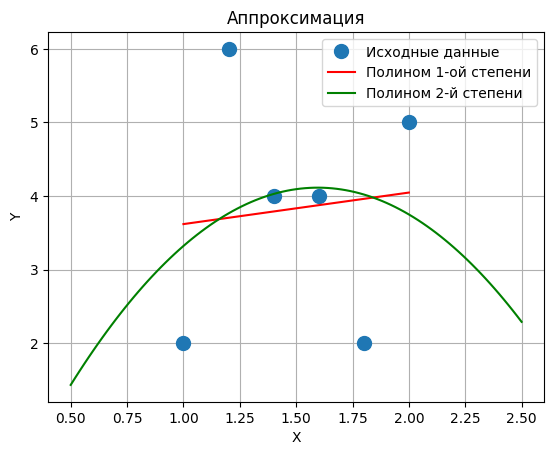

Коэффициенты для полинома первой степени:
Коэффициент наклона (m): 0.43
Свободный член (c): 3.19

Коэффициенты для полинома второй степени:
Коэффициент при x^2 (a): -2.23
Коэффициент при x (b): 7.12
Свободный член (c): -1.57


In [132]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
y = np.array([2.0, 6.0, 4.0, 4.0, 2.0, 5.0])

# y = mx + c
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]

# y = ax^2 + bx + c
m_poly = np.vstack([x**2, x, np.ones(len(x))]).T
a, b, c_poly = np.linalg.lstsq(m_poly, y, rcond=None)[0]

# Генерация точек для построения кривых
x_prec = np.linspace(min(x)-0.5, max(x)+0.5, 101)

plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m * x + c, 'r', label='Полином 1-ой степени')
plt.plot(x_prec, a * x_prec**2 + b * x_prec + c_poly, 'g', label='Полином 2-й степени')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Аппроксимация')
plt.legend()
plt.grid()
plt.show()

print(f"Коэффициенты для полинома первой степени:")
print(f"Коэффициент наклона (m): {m:.2f}")
print(f"Свободный член (c): {c:.2f}")

print(f"\nКоэффициенты для полинома второй степени:")
print(f"Коэффициент при x^2 (a): {a:.2f}")
print(f"Коэффициент при x (b): {b:.2f}")
print(f"Свободный член (c): {c_poly:.2f}")
